 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path('Resources/whale_returns.csv')
whale_returns_data = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True)
whale_returns_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_data = whale_returns_data.dropna()
whale_returns_data
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_Path = Path('Resources/algo_returns.csv')
algo_returns_data = pd.read_csv(algo_returns_Path, index_col='Date', parse_dates=True)
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_data = algo_returns_data.dropna()
algo_returns_data.isnull().sum()
algo_returns_data = algo_returns_data.sort_index(ascending=True)
algo_returns_data.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path('Resources/sp500_history.csv')
sp500_data = pd.read_csv(sp500_path, index_col='Date',infer_datetime_format=True, parse_dates=True)
sp500_data = sp500_data.sort_index(ascending=True)
sp500_data.head()

C:\Users\shant\AppData\Local\Temp\ipykernel_23968\2386412219.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_data = pd.read_csv(sp500_path, index_col='Date',infer_datetime_format=True, parse_dates=True)
C:\Users\shant\AppData\Local\Temp\ipykernel_23968\2386412219.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_data = pd.read_csv(sp500_path, index_col='Date',infer_datetime_format=True, parse_dates=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Fix Data Types
sp500_data["Close"] = sp500_data["Close"].replace('[\$,]','',regex=True).astype("float")
sp500_data.dtypes
sp500_data

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [10]:
# Calculate Daily Returns
sp500_daily_returns = sp500_data.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [11]:
# Drop nulls
sp500_daily_returns.isnull().sum()
sp500_daily_returns["Close"] = sp500_daily_returns["Close"].fillna("")
sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns={"Close":"sp500"}, inplace =True)
sp500_daily_returns

,sp500
Date,
2012-10-01,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [13]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_df = pd.concat([whale_returns_data, algo_returns_data, sp500_daily_returns], axis="columns", join="inner")
portfolio_df = portfolio_df.sort_index(ascending=True)
portfolio_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

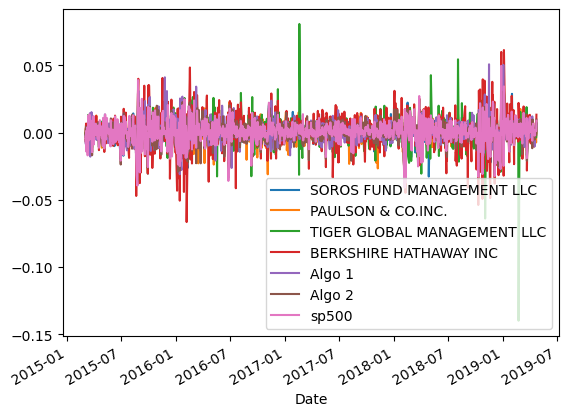

In [14]:
# Plot daily returns of all portfolios
portfolio_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns for All Portfolios'}, xlabel='Date'>

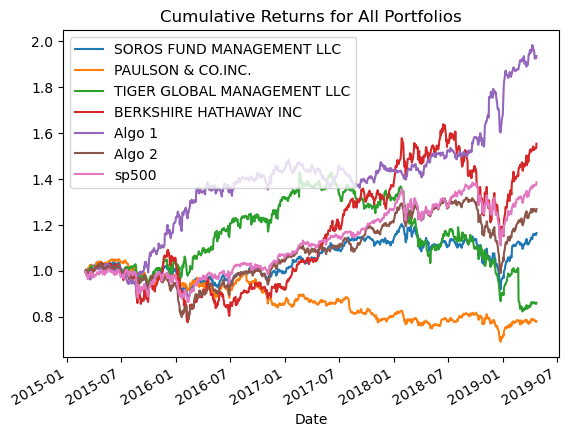

In [15]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_df).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(title ="Cumulative Returns for All Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Cumulative Retuns'}>

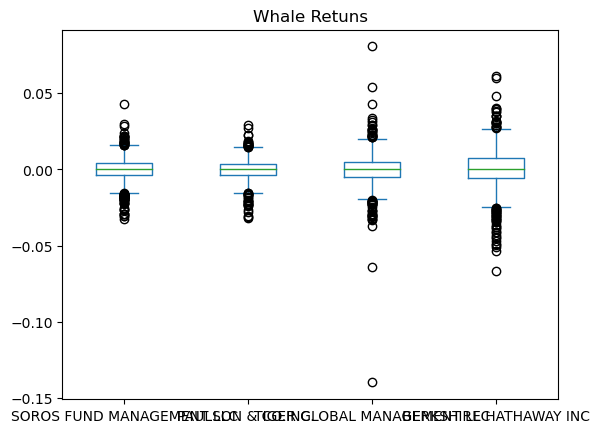

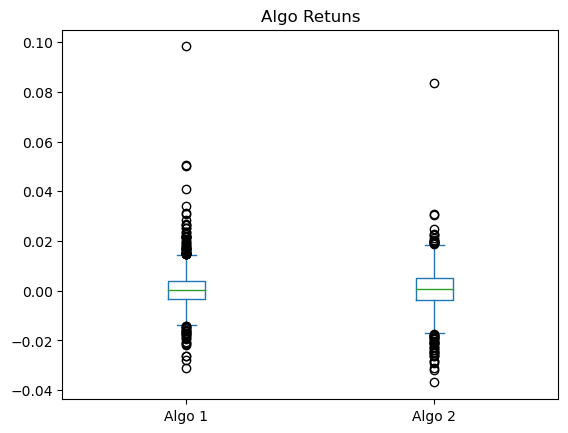

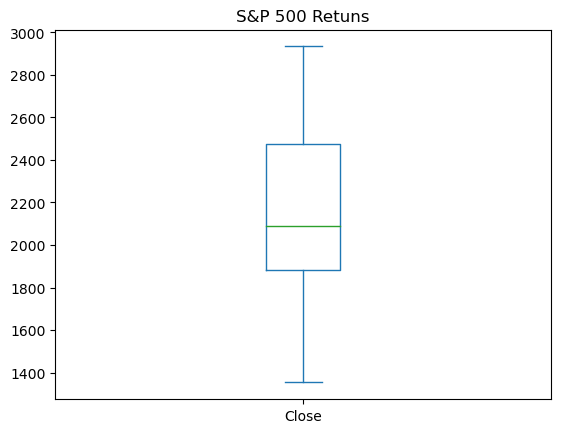

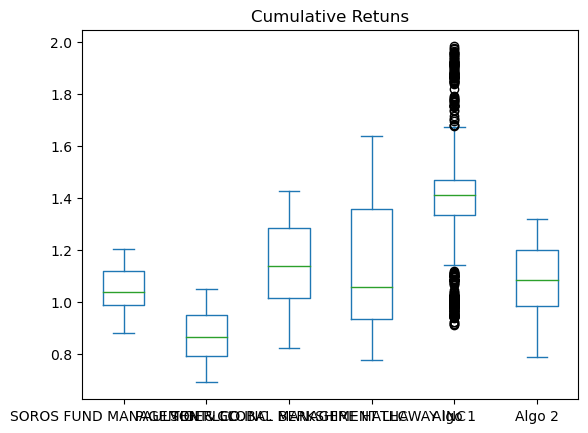

In [16]:
# Box plot to visually show risk
whale_returns_data.plot(kind='box', title ="Whale Retuns")

algo_returns_data.plot(kind='box', title ="Algo Retuns")

sp500_data.plot(kind='box', title ="S&P 500 Retuns")

cumulative_returns.plot(kind='box', title ="Cumulative Retuns")


### Calculate Standard Deviations

In [17]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = portfolio_df.std()
portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                          0.00762
Algo 2                         0.008342
sp500                          0.008554
dtype: object

### Determine which portfolios are riskier than the S&P 500

In [18]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_data.std()
sp500_std
# Determine which portfolios are riskier than the S&P 500
portfolio_std = portfolio_std.sort_values(ascending=False)
portfolio_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
sp500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                          0.00762
PAULSON & CO.INC.              0.007023
dtype: object

### Calculate the Annualized Standard Deviation

In [19]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_df * np.sqrt(252)
annualized_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.030830,-0.015073,-0.072048
2015-03-04,0.035399,0.051454,-0.040226,0.066880,-0.136343,0.038356,-0.069665
2015-03-05,0.063752,0.064705,0.037379,0.106777,-0.015161,0.068628,0.018987
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.078686,-0.181927,-0.225004
2015-03-09,0.009243,0.067076,0.092751,-0.026232,-0.086469,0.020688,0.062616


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation'}, xlabel='Date'>

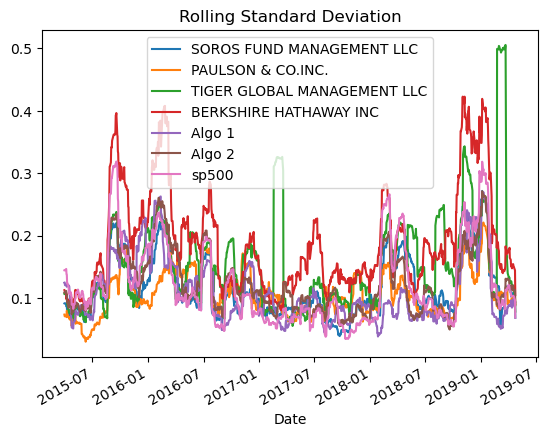

In [20]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
annualized_std.rolling(window=21).std
# Plot the rolling standard deviation
annualized_std.rolling(window=21).std().plot(title = "Rolling Standard Deviation")

### Calculate and plot the correlation

<Axes: >

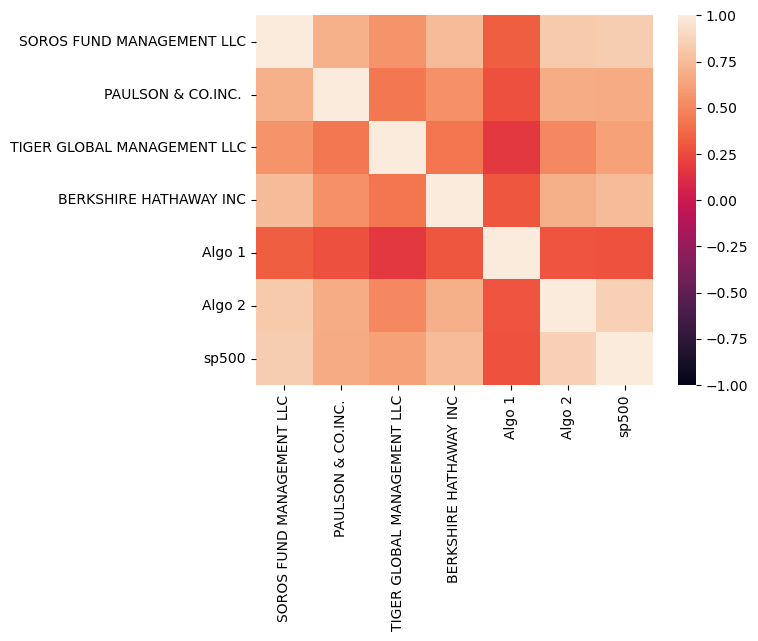

In [21]:
# Calculate the correlation
correlation = portfolio_df.corr()
correlation.head()
# Display de correlation matrix
sns.heatmap(correlation, vmax = 1, vmin = -1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': '60-days Rolling Beta'}, xlabel='Date'>

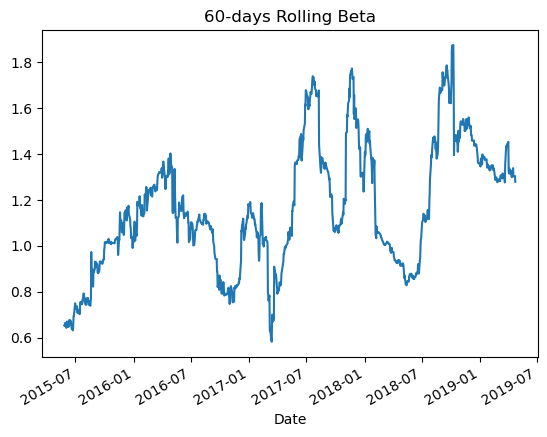

In [22]:
# Calculate covariance of a single portfolio
berkshire_covariance = portfolio_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(portfolio_df['sp500'])
berkshire_covariance
# Calculate variance of S&P 500
sp500_variance = portfolio_df['sp500'].rolling(window=60).var()
sp500_variance
# Computing beta
berkshire_beta = berkshire_covariance / sp500_variance
berkshire_beta
# Plot beta trend
berkshire_beta.plot(title ="60-days Rolling Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

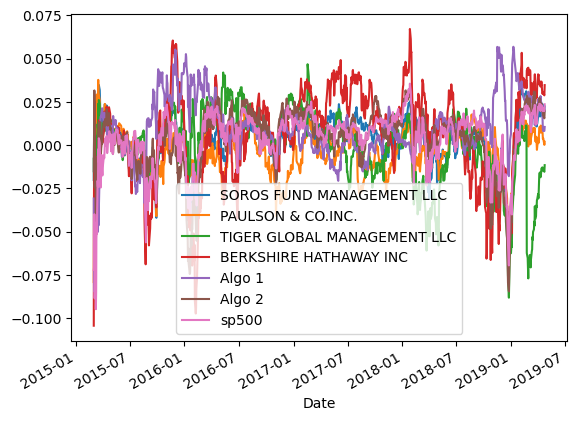

In [23]:
# Use `ewm` to calculate the rolling window
annualized_std = annualized_std.ewm(halflife=21).mean()
annualized_std.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [24]:
# Annualized Sharpe Ratios
sharpe_ratio = portfolio_df.mean() * 252 /(portfolio_std * np.sqrt(252))
sharpe_ratio

Algo 1                         1.378648
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC          0.62181
PAULSON & CO.INC.              -0.48357
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC    -0.12106
sp500                          0.648267
dtype: object

<Axes: title={'center': 'Sharpe Ratio'}>

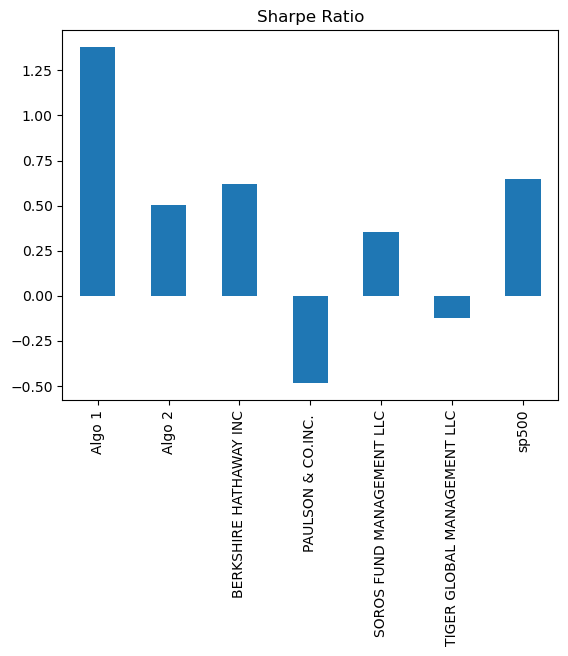

In [25]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind ='bar', title ="Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [26]:
# Reading data from 1st stock
apple_historical_path = Path('Resources/aapl_historical.csv')
apple_histocrical_data = pd.read_csv(apple_historical_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
apple_histocrical_data.head()

C:\Users\shant\AppData\Local\Temp\ipykernel_23968\3379844206.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  apple_histocrical_data = pd.read_csv(apple_historical_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [27]:
# Reading data from 2nd stock
cost_historical_path = Path('Resources/cost_historical.csv')
cost_historical_data = pd.read_csv(cost_historical_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_historical_data.head()

C:\Users\shant\AppData\Local\Temp\ipykernel_23968\93005470.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_historical_data = pd.read_csv(cost_historical_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [28]:
# Reading data from 3rd stock
google_historical_path = Path('Resources/goog_historical.csv')
google_historical_data = pd.read_csv(google_historical_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
google_historical_data.head()

C:\Users\shant\AppData\Local\Temp\ipykernel_23968\1411736564.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  google_historical_data = pd.read_csv(google_historical_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [29]:
# Combine all stocks in a single DataFrame
stocks_df = pd.concat([apple_histocrical_data, cost_historical_data, google_historical_data], axis="rows", join="inner")
stocks_df = stocks_df.sort_index(ascending=True)
stocks_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-11,AAPL,188.59
2018-05-11,COST,195.76
2018-05-14,AAPL,188.15
2018-05-14,COST,195.88


In [30]:
# Reset Date index
stocks_df = stocks_df.reset_index()
stocks_df

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-11,AAPL,188.59
2,2018-05-11,COST,195.76
3,2018-05-14,AAPL,188.15
4,2018-05-14,COST,195.88
...,...,...,...
745,2019-05-08,COST,241.34
746,2019-05-08,AAPL,202.90
747,2019-05-09,GOOG,1162.38
748,2019-05-09,COST,243.47


In [31]:
# Reorganize portfolio data by having a column per symbol
tri_stocks_df = stocks_df.pivot_table(index='Trade DATE', columns='Symbol', values='NOCP')

In [46]:
# Calculate daily returns
stocks_df_daily_returns = tri_stocks_df.pct_change()
# Drop NAs
stocks_df_daily_returns = stocks_df_daily_returns.dropna()
stocks_df_daily_returns.isnull().sum
stocks_df_daily_returns.head()
# Display sample data
stocks_df_daily_returns.sample()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-12-17,-0.009306,-0.023327,-0.024537


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stocks_df_returns = stocks_df_daily_returns.dot(weights)
stocks_df_returns.head()
# Display sample data
stocks_df_returns.sample()

Trade DATE
2019-01-03   -0.049762
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame
cum_portfolios = pd.concat([portfolio_df, stocks_df_returns], axis="columns", join="inner")
#cum_portfolios.head()

##Rename 0 to My Portfolio
cum_portfolios = cum_portfolios.rename(columns={0: "My Portfolio"})
cum_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
cum_portfolios = cum_portfolios.dropna()
cum_portfolios.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
sp500                          0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
cum_portfolios_std = cum_portfolios.std() * np.sqrt(252)
cum_portfolios_std.head()

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
dtype: object

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling Window 21 Days Std'}>

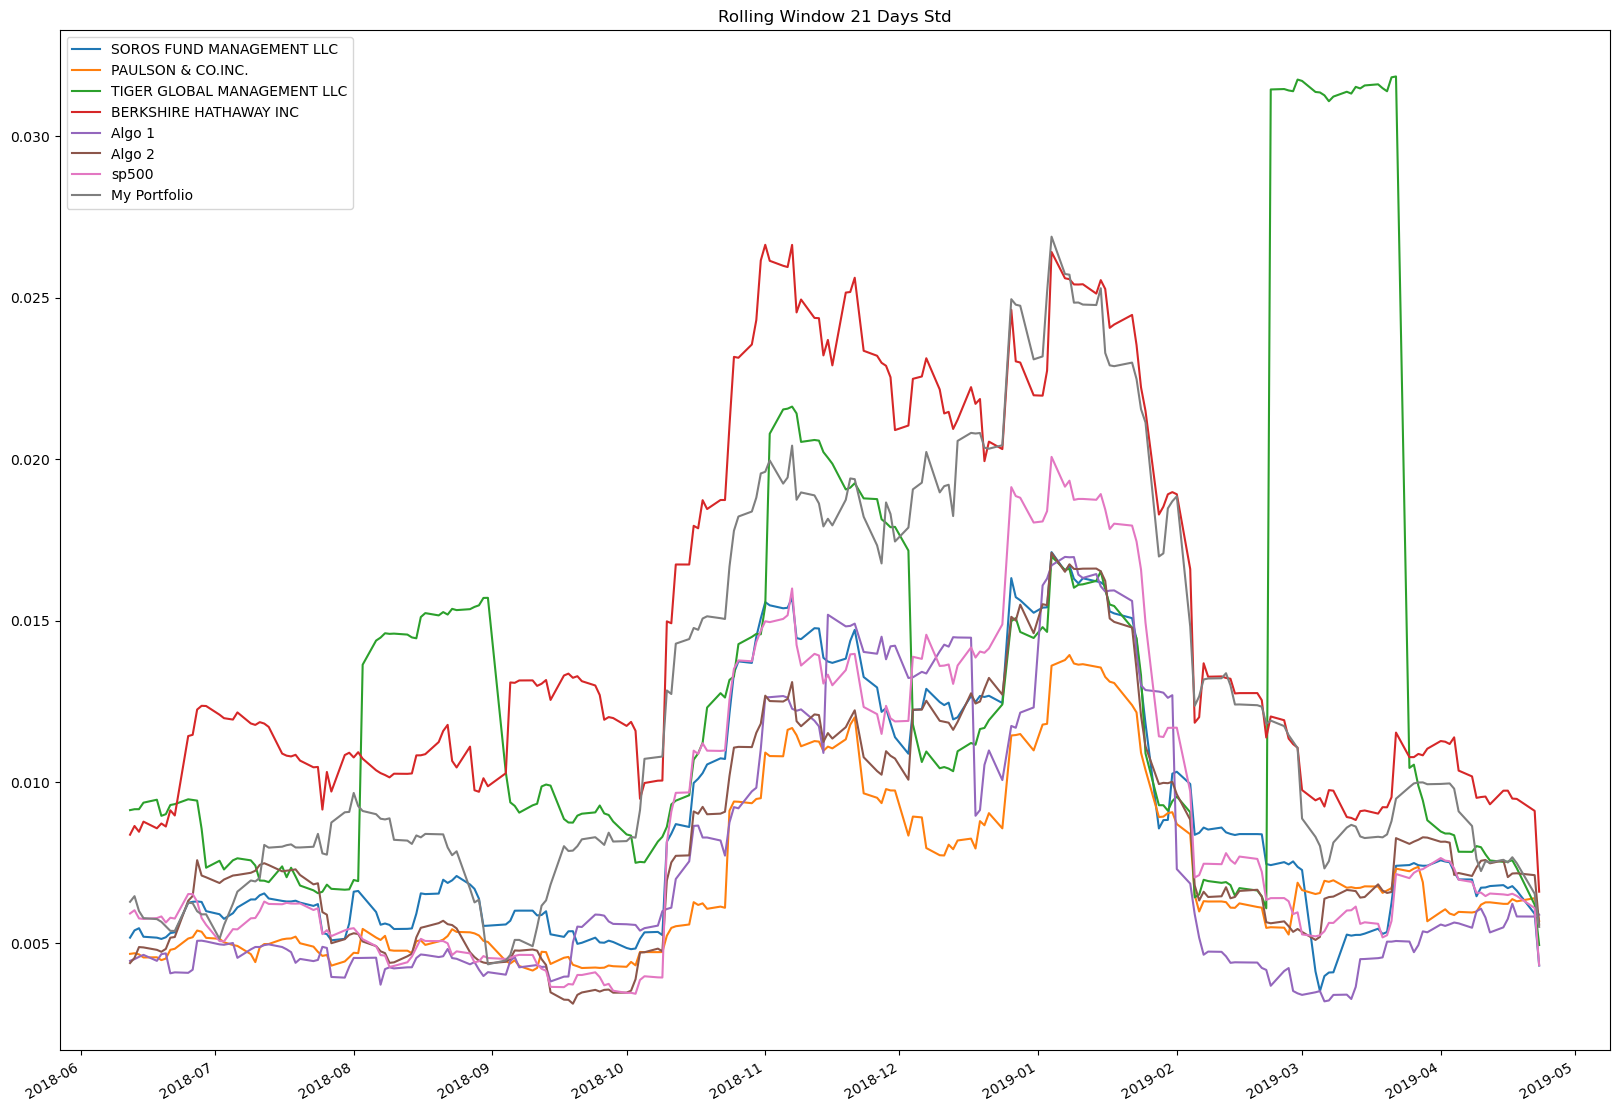

In [37]:
# Calculate rolling standard deviation
rollin_std=cum_portfolios.rolling(window=21).std()
# Pglot rolling standard deviation
rollin_std.plot(figsize =(20,15), title = "Rolling Window 21 Days Std")

### Calculate and plot the correlation

<Axes: >

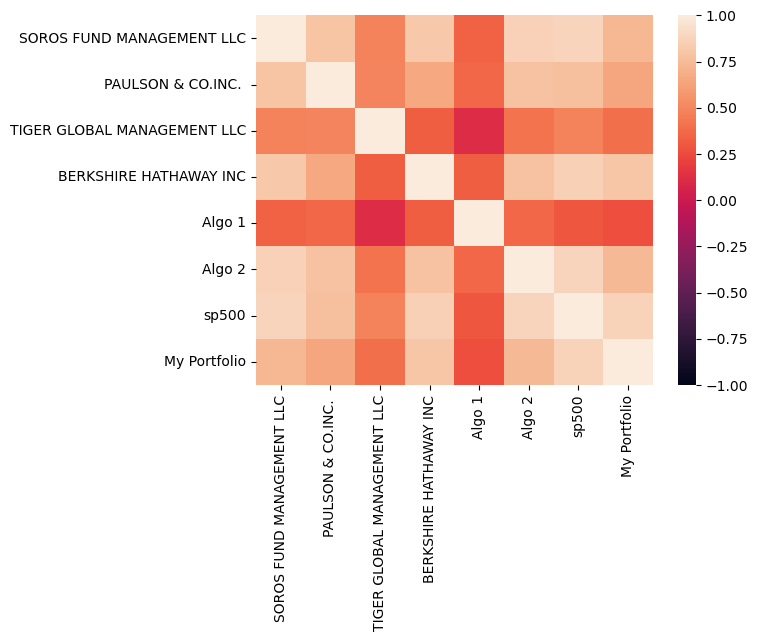

In [39]:
# Calculate and plot the correlation
cum_portfolios_correlation = cum_portfolios.corr()
cum_portfolios_correlation.head()
sns.heatmap(cum_portfolios_correlation, vmin = -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

my_portfolio_cov:2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-16    0.000048
2019-04-17    0.000042
2019-04-18    0.000042
2019-04-22    0.000042
2019-04-23    0.000042
Length: 237, dtype: float64
my_portfolio_var is:2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: sp500, Length: 237, dtype: float64


<Axes: title={'center': '60 Days Rolling Beta'}>

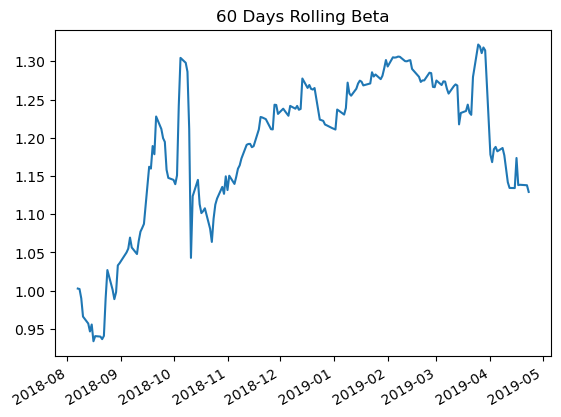

In [40]:
# Calculate and plot Beta
my_portfolio_cov = cum_portfolios['My Portfolio'].rolling(window=60).cov(cum_portfolios['sp500'])
print(f"my_portfolio_cov:{my_portfolio_cov}")
#Calculate Variance
my_portfolio_var = cum_portfolios['sp500'].rolling(window=60).var()
print(f"my_portfolio_var is:{my_portfolio_var}")

my_portfolio_beta = my_portfolio_cov / my_portfolio_var
my_portfolio_beta.plot(title="60 Days Rolling Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios
cum_portfolios_sharpe_ratio = (cum_portfolios.mean() * 252) / (cum_portfolios.std() * np.sqrt(252))
cum_portfolios_sharpe_ratio.sort_values(ascending=False)
cum_portfolios_sharpe_ratio


SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
sp500                           0.58482
My Portfolio                   0.933123
dtype: object

<Axes: >

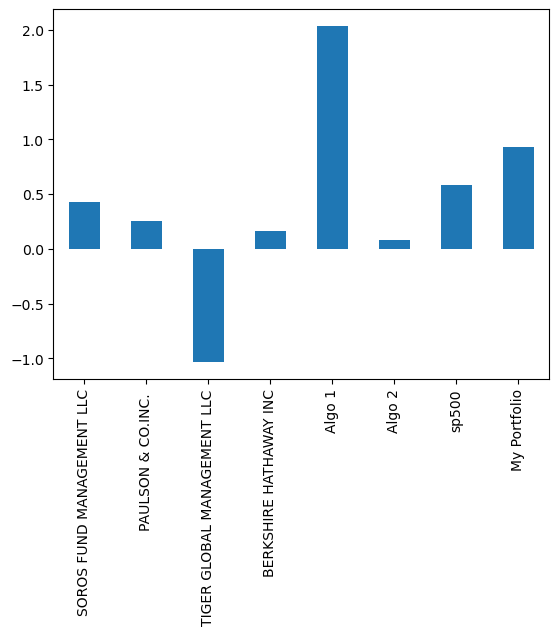

In [44]:
# Visualize the sharpe ratios as a bar plot
cum_portfolios_sharpe_ratio.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

In [ ]:
Out of all investments, two are doing good. My portfolio is doing well but Algo 1 is doing excellent.